# Library

In [1]:
pip install pyvi

     |████████████████████████████████| 8.5 MB 5.1 MB/s 
     |████████████████████████████████| 743 kB 60.5 MB/s 


In [2]:
import pandas as pd
from pyvi.ViTokenizer import ViTokenizer
# statistic dataset

TRAIN = 'drive/MyDrive/CODE/HSD/dataset/train.csv'
TRAIN_AUG = 'drive/My Drive/CODE/HSD/dataset/aug/train_augmented_dataset.csv'
DEV = 'drive/MyDrive/CODE/HSD/dataset/dev.csv'
TEST = 'drive/MyDrive/CODE/HSD/dataset/test.csv'

train_data = pd.read_csv(TRAIN, index_col=False)
train_data_aug = pd.read_csv(TRAIN_AUG, index_col=False)
dev_data = pd.read_csv(DEV, index_col=False)
test_data = pd.read_csv(TEST, index_col=False)

total = pd.concat([train_data, dev_data, test_data])

def make_statistic(full_data):
    label0 = full_data.loc[full_data['label_id']==0]
    label1 = full_data.loc[full_data['label_id']==1]
    label2 = full_data.loc[full_data['label_id']==2]

    print("Total data:", len(full_data))
    print("Total data in label 0: ", len(label0))
    print("Total data in label 1: ", len(label1))
    print("Total data in label 2: ", len(label2))

    def get_total_words(dt):
        texts = dt['free_text']
        count = 0
        list_words = []
        for t in texts:
            tokenized_t = ViTokenizer.tokenize(str(t))
            list_words += tokenized_t.split()
            list_words = list(set(list_words))
            # count = count + len(list_words)

        # return len(set(list_words))
        # return count
        return len(list_words)
        
    def get_total_length(dt):
        texts = dt['free_text']
        count = 0

        for t in texts:
            count = count + len(str(t))

        # return len(set(list_words))
        # return count
        return count

    print("Vocabulary size in labels 0:", get_total_words(label0))
    print("Vocabulary size in labels 1:", get_total_words(label1))
    print("Vocabulary size in labels 2:", get_total_words(label2))
    print("Total Vocabulary size:", get_total_words(full_data))

    print("Average words in labels 0:", str(get_total_length(label0)/len(label0)))
    print("Average words in labels 1:", str(get_total_length(label1)/len(label1)))
    print("Average words in labels 2:", str(get_total_length(label2)/len(label2)))
    print("Average words:", str(get_total_length(full_data)/len(full_data)))

def get_len_set(data, label=0):
    len_data = []
    len_label = []
    if label == -1:
        dt = data
    else:
        dt = data.loc[data['label_id']==label]
    
    texts = dt['free_text'].values
    len_label = dt['label_id'].values
    for t in texts:
        len_data.append(len(str(t)))

    return pd.DataFrame({'len_of_texts': len_data, 'label_id': len_label})


def make_wordcloud(data):
    comment_words = '' 
    for val in data:
        
        val = str(val)
        # tokens = ViTokenizer.tokenize(str(val)).split()
        tokens = val.split()

        # for i in range(len(tokens)):
        #     tokens[i] = tokens[i].lower()
        
        comment_words += " ".join(tokens)+" "
    
    wordcloud = WordCloud(width=500, height=500, background_color ='white', relative_scaling=.5)
    wordcloud.generate(comment_words)

    return wordcloud

# Overview

In [3]:
print('-------TRAINING SET---------------')
make_statistic(train_data)

print('-------TRAINING SET AUG---------------')
make_statistic(train_data_aug)

print('-------VALID SET---------------')
make_statistic(dev_data)

print('-------TEST SET---------------')
make_statistic(test_data)

print('-------TOTAL ---------------')
make_statistic(total)

-------TRAINING SET---------------
Total data: 24048
Total data in label 0:  19886
Total data in label 1:  1606
Total data in label 2:  2556
Vocabulary size in labels 0: 20969
Vocabulary size in labels 1: 4343
Vocabulary size in labels 2: 7931
Total Vocabulary size: 24456
Average words in labels 0: 45.27235240872976
Average words in labels 1: 44.056039850560396
Average words in labels 2: 83.77699530516432
Average words: 49.28368263473054
-------TRAINING SET AUG---------------
Total data: 59153
Total data in label 0:  19886
Total data in label 1:  15062
Total data in label 2:  24205
Vocabulary size in labels 0: 20969
Vocabulary size in labels 1: 6243
Vocabulary size in labels 2: 10865
Total Vocabulary size: 27460
Average words in labels 0: 45.27235240872976
Average words in labels 1: 42.74843978223343
Average words in labels 2: 74.31654616814707
Average words: 56.51437796899565
-------VALID SET---------------
Total data: 2672
Total data in label 0:  2190
Total data in label 1:  212
Tota

# Charts

[(0.0, 500.0)]

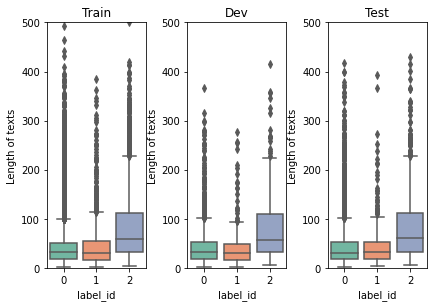

In [4]:
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np

len_train = get_len_set(train_data, label=-1)
len_dev = get_len_set(dev_data, label=-1)
len_test = get_len_set(test_data, label=-1)

fig, axs = plt.subplots(ncols=3)
fig.tight_layout()

ax = sns.boxplot(y=len_train['len_of_texts'], x=len_train['label_id'], palette="Set2", ax=axs[0])
ax.set_title("Train")
ax.set_ylabel("Length of texts")
ax.set(ylim=(0,500))
ax = sns.boxplot(y=len_dev['len_of_texts'], x=len_dev['label_id'], palette="Set2", ax=axs[1])
ax.set_title("Dev")
ax.set_ylabel("Length of texts")
ax.set(ylim=(0,500))
ax = sns.boxplot(y=len_test['len_of_texts'], x=len_test['label_id'], palette="Set2", ax=axs[2])
ax.set_title("Test")
ax.set_ylabel("Length of texts")
ax.set(ylim=(0,500))

[(0.0, 500.0)]

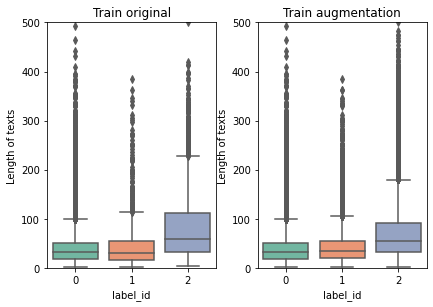

In [5]:
import seaborn as sns
import numpy as np

len_train = get_len_set(train_data, label=-1)
len_train_aug = get_len_set(train_data_aug, label=-1)

fig, axs = plt.subplots(ncols=2)
fig.tight_layout()

ax = sns.boxplot(y=len_train['len_of_texts'], x=len_train['label_id'], palette="Set2", ax=axs[0])
ax.set_title("Train original")
ax.set(ylim=(0,500))
ax.set_ylabel("Length of texts")
ax = sns.boxplot(y=len_train_aug['len_of_texts'], x=len_train_aug['label_id'], palette="Set2", ax=axs[1])
ax.set_title("Train augmentation")
ax.set_ylabel("Length of texts")
ax.set(ylim=(0,500))

# Wordcloud

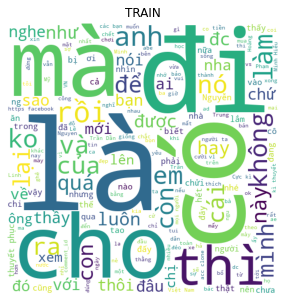

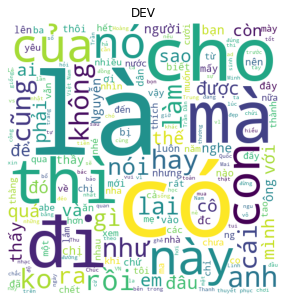

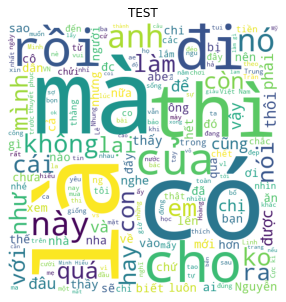

In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

wordcloud_train = make_wordcloud(train_data['free_text'])      
wordcloud_dev = make_wordcloud(dev_data['free_text']) 
wordcloud_test = make_wordcloud(test_data['free_text'])     

# plt.figure(figsize=(8, 8))

fig.add_subplot(3, 3, 1)
plt.imshow(wordcloud_train)
plt.title("TRAIN")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

plt.imshow(wordcloud_dev)
plt.title("DEV")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

plt.imshow(wordcloud_test)
plt.title("TEST")
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

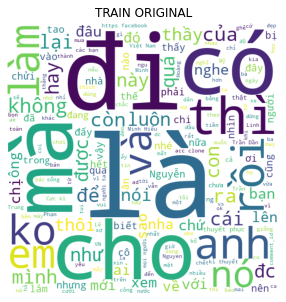

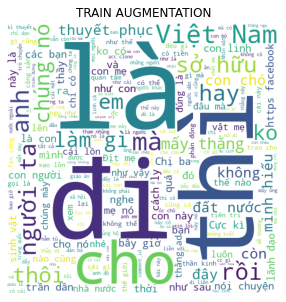

In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

wordcloud_train = make_wordcloud(train_data['free_text'])      
wordcloud_train_aug = make_wordcloud(train_data_aug['free_text'])     

plt.imshow(wordcloud_train)
plt.title("TRAIN ORIGINAL")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

plt.imshow(wordcloud_train_aug)
plt.title("TRAIN AUGMENTATION")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
